In [1]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df1 = pd.read_csv('/content/drive/MyDrive/big_data_set1_f.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/big_data_set2_f.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/big_data_set3_f.csv', encoding='cp949')

print("df1 head:")
display(df1.head())

print("\ndf2 head:")
display(df2.head())

print("\ndf3 head:")
display(df3.head())

df1 head:


,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN



df2 head:


,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN,RC_M1_SAA,RC_M1_TO_UE_CT,RC_M1_UE_CUS_CN,RC_M1_AV_NP_AT,APV_CE_RAT,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,M12_SME_RY_SAA_PCE_RT,M12_SME_BZN_SAA_PCE_RT,M12_SME_RY_ME_MCT_RAT,M12_SME_BZN_ME_MCT_RAT
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6



df3 head:


,ENCODED_MCT,TA_YM,M12_MAL_1020_RAT,M12_MAL_30_RAT,M12_MAL_40_RAT,M12_MAL_50_RAT,M12_MAL_60_RAT,M12_FME_1020_RAT,M12_FME_30_RAT,M12_FME_40_RAT,M12_FME_50_RAT,M12_FME_60_RAT,MCT_UE_CLN_REU_RAT,MCT_UE_CLN_NEW_RAT,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT
0,0305234DDB,202311,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.0,-999999.9,-999999.9,-999999.9
1,0495B069FF,202403,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,25.0,0.0,0.0,100.0
2,0495B069FF,202405,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
3,0495B069FF,202406,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
4,055EDDDD01,202410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9


In [3]:
# 첫 번째 데이터셋 칼럼명 매핑
column_mapping_1 = {
    'ENCODED_MCT': '가맹점구분번호',
    'MCT_BSE_AR': '가맹점주소',
    'GDS_AF_MCT_AR': '가맹점주소',
    'MCT_NM': '가맹점명',
    'MCT_BRD_NUM': '브랜드구분코드',
    'MCT_SIGUNGU_NM': '가맹점지역',
    'HPSN_MCT_ZCD_NM': '업종',
    'HPSN_MCT_BZN_CD_NM': '상권',
    'ARE_D': '개설일',
    'MCT_ME_D': '폐업일'
}

# 두 번째 데이터셋 칼럼명 매핑
column_mapping_2 = {
    'ENCODED_MCT': '가맹점구분번호',
    'TA_YM': '기준년월',
    'MCT_OPE_MS_CN': '가맹점운영개월수구간',
    'RC_M1_SAA': '매출금액구간',
    'RC_M1_TO_UE_CT': '매출건수구간',
    'RC_M1_UE_CUS_CN': '유니크고객수구간',
    'RC_M1_AV_NP_AT': '객단가구간',
    'APV_CE_RAT': '취소율구간',
    'DLV_SAA_RAT': '배달매출금액비율',
    'M1_SME_RY_SAA_RAT': '동일업종매출금액비율',
    'M1_SME_RY_CNT_RAT': '동일업종매출건수비율',
    'M12_SME_RY_SAA_PCE_RT': '동일업종내매출순위비율',
    'M12_SME_BZN_SAA_PCE_RT': '동일상권내매출순위비율',
    'M12_SME_RY_ME_MCT_RAT': '동일업종내해지가맹점비중',
    'M12_SME_BZN_ME_MCT_RAT': '동일상권내해지가맹점비중'
}

# 세 번째 데이터셋 칼럼명 매핑
column_mapping_3 = {
    'ENCODED_MCT': '가맹점구분번호',
    'TA_YM': '기준년월',
    'M12_MAL_1020_RAT': '남성20대이하고객비중',
    'M12_MAL_30_RAT': '남성30대고객비중',
    'M12_MAL_40_RAT': '남성40대고객비중',
    'M12_MAL_50_RAT': '남성50대고객비중',
    'M12_MAL_60_RAT': '남성60대이상고객비중',
    'M12_FME_1020_RAT': '여성20대이하고객비중',
    'M12_FME_30_RAT': '여성30대고객비중',
    'M12_FME_40_RAT': '여성40대고객비중',
    'M12_FME_50_RAT': '여성50대고객비중',
    'M12_FME_60_RAT': '여성60대이상고객비중',
    'MCT_UE_CLN_REU_RAT': '재방문고객비중',
    'MCT_UE_CLN_NEW_RAT': '신규고객비중',
    'RC_M1_SHC_RSD_UE_CLN_RAT': '거주이용고객비율',
    'RC_M1_SHC_WP_UE_CLN_RAT': '직장이용고객비율',
    'RC_M1_SHC_FLP_UE_CLN_RAT': '유동인구이용고객비율'
}

# 각 데이터프레임 칼럼명 변경
df1.rename(columns=column_mapping_1, inplace=True)
df2.rename(columns=column_mapping_2, inplace=True)
df3.rename(columns=column_mapping_3, inplace=True)

In [4]:
df1.head()

,가맹점구분번호,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN


In [5]:
df2.head()

,가맹점구분번호,기준년월,가맹점운영개월수구간,매출금액구간,매출건수구간,유니크고객수구간,객단가구간,취소율구간,배달매출금액비율,동일업종매출금액비율,동일업종매출건수비율,동일업종내매출순위비율,동일상권내매출순위비율,동일업종내해지가맹점비중,동일상권내해지가맹점비중
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6


In [6]:
df3.head()

,가맹점구분번호,기준년월,남성20대이하고객비중,남성30대고객비중,남성40대고객비중,남성50대고객비중,남성60대이상고객비중,여성20대이하고객비중,여성30대고객비중,여성40대고객비중,여성50대고객비중,여성60대이상고객비중,재방문고객비중,신규고객비중,거주이용고객비율,직장이용고객비율,유동인구이용고객비율
0,0305234DDB,202311,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.0,-999999.9,-999999.9,-999999.9
1,0495B069FF,202403,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,25.0,0.0,0.0,100.0
2,0495B069FF,202405,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
3,0495B069FF,202406,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
4,055EDDDD01,202410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 
 4   가맹점지역    4185 non-null   object 
 5   업종       4185 non-null   object 
 6   상권       3138 non-null   object 
 7   개설일      4185 non-null   int64  
 8   폐업일      127 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.4+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가맹점구분번호       86590 non-null  object 
 1   기준년월          86590 non-null  int64  
 2   가맹점운영개월수구간    86590 non-null  object 
 3   매출금액구간        86590 non-null  object 
 4   매출건수구간        86590 non-null  object 
 5   유니크고객수구간      86590 non-null  object 
 6   객단가구간         86590 non-null  object 
 7   취소율구간         79958 non-null  object 
 8   배달매출금액비율      86590 non-null  float64
 9   동일업종매출금액비율    86590 non-null  float64
 10  동일업종매출건수비율    86590 non-null  float64
 11  동일업종내매출순위비율   86590 non-null  float64
 12  동일상권내매출순위비율   86590 non-null  float64
 13  동일업종내해지가맹점비중  86590 non-null  float64
 14  동일상권내해지가맹점비중  86590 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 9.9+ MB


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가맹점구분번호      86590 non-null  object 
 1   기준년월         86590 non-null  int64  
 2   남성20대이하고객비중  86590 non-null  float64
 3   남성30대고객비중    86590 non-null  float64
 4   남성40대고객비중    86590 non-null  float64
 5   남성50대고객비중    86590 non-null  float64
 6   남성60대이상고객비중  86590 non-null  float64
 7   여성20대이하고객비중  86590 non-null  float64
 8   여성30대고객비중    86590 non-null  float64
 9   여성40대고객비중    86590 non-null  float64
 10  여성50대고객비중    86590 non-null  float64
 11  여성60대이상고객비중  86590 non-null  float64
 12  재방문고객비중      86590 non-null  float64
 13  신규고객비중       86590 non-null  float64
 14  거주이용고객비율     86590 non-null  float64
 15  직장이용고객비율     86590 non-null  float64
 16  유동인구이용고객비율   86590 non-null  float64
dtypes: float64(15), int64(1), object(1)
memory usage: 11.2+ MB


In [10]:
# df2와 df3를 '가맹점구분번호'와 '기준년월'을 기준으로 inner join
merged_df2_df3_monthly = pd.merge(df2, df3, on=['가맹점구분번호', '기준년월'], how='inner')

# merged_df2_df3_monthly에 df1을 '가맹점구분번호'를 기준으로 left join
# 이렇게 하면 df2와 df3의 월별 데이터는 모두 유지되고, df1의 정보가 추가
merged_df_final = pd.merge(merged_df2_df3_monthly, df1, on='가맹점구분번호', how='left')

print("\n병합된 데이터프레임 정보:")
merged_df_final.info()


병합된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가맹점구분번호       86590 non-null  object 
 1   기준년월          86590 non-null  int64  
 2   가맹점운영개월수구간    86590 non-null  object 
 3   매출금액구간        86590 non-null  object 
 4   매출건수구간        86590 non-null  object 
 5   유니크고객수구간      86590 non-null  object 
 6   객단가구간         86590 non-null  object 
 7   취소율구간         79958 non-null  object 
 8   배달매출금액비율      86590 non-null  float64
 9   동일업종매출금액비율    86590 non-null  float64
 10  동일업종매출건수비율    86590 non-null  float64
 11  동일업종내매출순위비율   86590 non-null  float64
 12  동일상권내매출순위비율   86590 non-null  float64
 13  동일업종내해지가맹점비중  86590 non-null  float64
 14  동일상권내해지가맹점비중  86590 non-null  float64
 15  남성20대이하고객비중   86590 non-null  float64
 16  남성30대고객비중     86590 non-null  float64
 17  남성40대고객비중     86590 non-null  float64
 18  남성50대고객비중 

In [11]:
# merged_df_left 데이터프레임을 CSV 파일로 저장
merged_df_final.to_csv('merged_df_final.csv', index=False, encoding='cp949')

In [12]:
merged_df_final.isnull().sum()

,0
가맹점구분번호,0
기준년월,0
가맹점운영개월수구간,0
매출금액구간,0
매출건수구간,0
유니크고객수구간,0
객단가구간,0
취소율구간,6632
배달매출금액비율,0
동일업종매출금액비율,0


In [13]:
# 결측치가 있는 칼럼 확인
cols_with_missing = merged_df_final.columns[merged_df_final.isnull().any()].tolist()

print(f"결측치가 있는 칼럼: {cols_with_missing}")

# 결측치가 있는 칼럼 제외 (단, 폐업일은 종속변수 생성에 필요하므로 제외하지 않음)
cols_to_drop = [col for col in cols_with_missing if col != '폐업일']

merged_df_processed = merged_df_final.drop(columns=cols_to_drop)

# 1. 종속 변수 생성: '폐업일' 컬럼의 결측치 여부로 폐업 여부 (1: 폐업, 0: 유지)를 나타내는 종속 변수 생성
merged_df_processed['폐업여부'] = merged_df_processed['폐업일'].apply(lambda x: 1 if pd.notnull(x) else 0)

결측치가 있는 칼럼: ['취소율구간', '브랜드구분코드', '상권', '폐업일']


In [14]:
cols = ['배달매출금액비율', '동일업종매출금액비율', '동일업종매출건수비율',
        '동일업종내매출순위비율', '동일상권내매출순위비율',
        '동일업종내해지가맹점비중', '동일상권내해지가맹점비중','남성20대이하고객비중', '남성30대고객비중', '남성40대고객비중', '남성50대고객비중', '남성60대이상고객비중',
            '여성20대이하고객비중', '여성30대고객비중', '여성40대고객비중', '여성50대고객비중', '여성60대이상고객비중','재방문고객비중', '신규고객비중', '거주이용고객비율', '직장이용고객비율', '유동인구이용고객비율']

merged_df_processed = merged_df_processed[~merged_df_processed[cols].isin([-999999.9]).any(axis=1)]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 유효한 독립변수 10개 선택
feature_cols = [
     '매출금액구간', '매출건수구간', '유니크고객수구간', '객단가구간',
    '배달매출금액비율', '동일업종매출금액비율', '동일업종매출건수비율',
    '동일업종내매출순위비율', '동일상권내매출순위비율',
    '동일업종내해지가맹점비중', '동일상권내해지가맹점비중',
    '남성20대이하고객비중', '남성30대고객비중', '남성40대고객비중',
    '남성50대고객비중', '남성60대이상고객비중',
    '여성20대이하고객비중', '여성30대고객비중', '여성40대고객비중',
    '여성50대고객비중', '여성60대이상고객비중',
    '재방문고객비중', '신규고객비중',
    '거주이용고객비율', '직장이용고객비율', '유동인구이용고객비율'
]

# 독립변수 X
X = merged_df_processed[feature_cols]

# 종속변수 y (폐업여부 또는 위험수위)
y = merged_df_processed['폐업여부']

# 2. 독립 변수 전처리: 범주형 변수 인코딩 및 결측치 처리
categorical_cols = X.select_dtypes(include='object').columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# 3. 데이터 분할: 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # 폐업/유지 비율 유지를 위해 stratify 사용

print(f"\n학습 세트 크기: {X_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}")
print(f"종속변수 학습 세트 크기: {y_train.shape}")
print(f"종속변수 테스트 세트 크기: {y_test.shape}")


학습 세트 크기: (16823, 26)
테스트 세트 크기: (4206, 26)
종속변수 학습 세트 크기: (16823,)
종속변수 테스트 세트 크기: (4206,)


/tmp/ipython-input-476110882.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-476110882.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-476110882.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [16]:
import xgboost as xgb

# XGBoost 분류 모델 초기화 및 학습
# objective='binary:logistic'는 이진 분류를 위한 설정.
# eval_metric='logloss'는 학습 중 평가 지표로 logloss를 사용
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:45:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
# 테스트 세트에 대한 확률 예측
# predict_proba()는 각 클래스에 대한 확률을 반환
# 이진 분류의 경우, 두 번째 열([:, 1])이 긍정 클래스(폐업)에 대한 확률
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost 모델 확률 예측 완료. (상위 10개 예측 확률값):")
print(y_pred_proba_xgb[:10])


XGBoost 모델 확률 예측 완료. (상위 10개 예측 확률값):
[8.4889281e-05 7.3129559e-05 3.3890107e-04 3.8256479e-04 6.1478757e-05
 1.1031821e-03 2.1354906e-05 3.3698027e-04 1.3851945e-04 7.0942474e-06]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 모델 평가
print("--- XGBoost 모델 평가 결과 ---")

# 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"정확도 (Accuracy): {accuracy:.4f}")

# 정밀도 (Precision) - 폐업으로 예측한 것 중 실제 폐업 비율
precision = precision_score(y_test, y_pred_xgb)
print(f"정밀도 (Precision): {precision:.4f}")

# 재현율 (Recall) - 실제 폐업 중 모델이 폐업으로 예측한 비율 (민감도)
recall = recall_score(y_test, y_pred_xgb)
print(f"재현율 (Recall): {recall:.4f}")

# F1-score - 정밀도와 재현율의 조화평균
f1 = f1_score(y_test, y_pred_xgb)
print(f"F1-score: {f1:.4f}")

# ROC AUC - 분류 모델의 성능을 나타내는 대표적인 지표 (확률값 필요)
# y_pred_proba_xgb는 긍정 클래스(폐업, 1)에 대한 확률
auc = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC: {auc:.4f}")

# 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred_xgb)
print("\n혼동 행렬 (Confusion Matrix):")
print(cm)

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

--- XGBoost 모델 평가 결과 ---
정확도 (Accuracy): 0.9933
정밀도 (Precision): 0.9907
재현율 (Recall): 0.7985
F1-score: 0.8843
ROC AUC: 0.9855

혼동 행렬 (Confusion Matrix):
[[4071    1]
 [  27  107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4072
           1       0.99      0.80      0.88       134

    accuracy                           0.99      4206
   macro avg       0.99      0.90      0.94      4206
weighted avg       0.99      0.99      0.99      4206



In [19]:
# 전체 데이터셋 (X)에 대한 확률 예측
# predict_proba()는 각 클래스에 대한 확률을 반환
# 이진 분류의 경우, 두 번째 열([:, 1])이 긍정 클래스(폐업)에 대한 확률
y_pred_proba_all = xgb_model.predict_proba(X)[:, 1]

# merged_df_processed 데이터프레임에 '폐업확률' 칼럼 추가 및 예측 확률 매핑
# 전체 데이터셋에 대한 확률값이 추가
merged_df_processed['폐업확률'] = y_pred_proba_all

print("\n'폐업확률' 칼럼이 추가된 데이터프레임 (상위 10개 행):")
display(merged_df_processed[['가맹점구분번호', '기준년월', '폐업여부', '폐업확률']].head(10))


'폐업확률' 칼럼이 추가된 데이터프레임 (상위 10개 행):


,가맹점구분번호,기준년월,폐업여부,폐업확률
7,003AC99735,202311,0,0.001488
8,003AC99735,202304,0,0.001740
9,003AC99735,202411,0,0.000330
10,003AC99735,202409,0,0.000252
11,003AC99735,202403,0,0.000937
12,003AC99735,202402,0,0.000911
13,003AC99735,202312,0,0.001914
14,003AC99735,202303,0,0.001213
15,0041E4E5AE,202409,0,0.000012
16,0041E4E5AE,202302,0,0.000083


In [20]:
# merged_df_left 데이터프레임을 CSV 파일로 저장
merged_df_processed.to_csv('merged_df_prob.csv', index=False, encoding='cp949')

In [21]:
print("\n상세 정보:")
closure_counts = merged_df_processed['폐업여부'].value_counts()
total = len(merged_df_processed)
print(f"전체 데이터: {total:,}개")
print(f"영업중(0): {closure_counts[0]:,}개 ({closure_counts[0]/total*100:.2f}%)")
print(f"폐업(1): {closure_counts[1]:,}개 ({closure_counts[1]/total*100:.2f}%)")


상세 정보:
전체 데이터: 21,029개
영업중(0): 20,360개 (96.82%)
폐업(1): 669개 (3.18%)


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

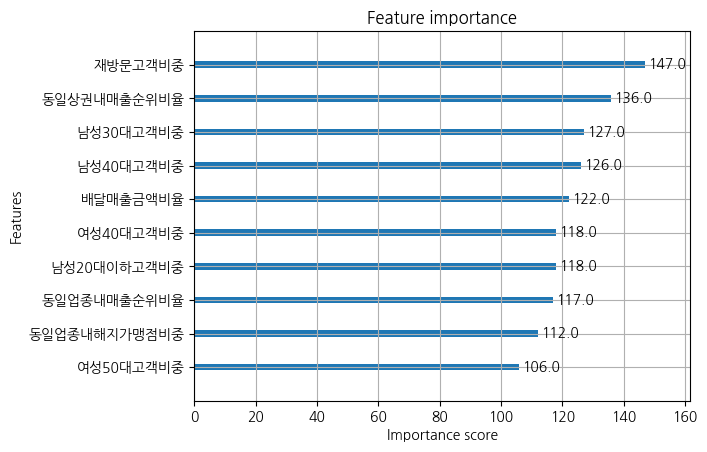

In [22]:
import warnings
import matplotlib.pyplot as plt
import matplotlib

# 모든 matplotlib 경고 무시
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트 캐시 초기화
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 추가적인 경고 메시지 비활성화
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# Feature Importance 확인
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.show()

In [23]:
print(f"고유 가맹점 수: {merged_df_processed['가맹점구분번호'].nunique()}")

고유 가맹점 수: 1187


# 모델 저장하기

In [24]:
import pickle
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 데이터 다시 로드 (인코딩 전 원본 데이터 필요)
df_original = merged_df_processed.copy()

# 인코더 생성 및 저장
label_encoders = {}

# 카테고리 컬럼들
categorical_cols = ['가맹점운영개월수구간', '매출금액구간', '매출건수구간', '유니크고객수구간',
                   '객단가구간', '가맹점지역', '업종']

for col in categorical_cols:
    if col in df_original.columns:
        le = LabelEncoder()
        le.fit(df_original[col].astype(str))  # 원본 데이터로 fit
        label_encoders[col] = le
        print(f"{col}: {len(le.classes_)}개 카테고리")
        print(f"  예시: {list(le.classes_)[:3]}")

# 모델 패키지 생성
model_package = {
    'model': xgb_model,
    'label_encoders': label_encoders,
    'feature_cols': list(X.columns),
    'categorical_cols': list(categorical_cols),
    'model_info': {
        'name': 'XGBoost 가맹점 폐업 예측 모델',
        'version': '1.0.0',
        'accuracy': float(accuracy),
        'features': list(X.columns)
    }
}

# 저장
with open('franchise_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("\n✓ 모델 저장 완료!")

# 테스트
print("\n=== 인코더 테스트 ===")
print("매출금액구간 classes:", label_encoders['매출금액구간'].classes_[:5])

# 다운로드
from google.colab import files
files.download('franchise_model.pkl')

가맹점운영개월수구간: 6개 카테고리
  예시: ['1_10%이하', '2_10-25%', '3_25-50%']
매출금액구간: 6개 카테고리
  예시: ['1_10%이하', '2_10-25%', '3_25-50%']
매출건수구간: 5개 카테고리
  예시: ['1_10%이하', '2_10-25%', '3_25-50%']
유니크고객수구간: 5개 카테고리
  예시: ['1_10%이하', '2_10-25%', '3_25-50%']
객단가구간: 6개 카테고리
  예시: ['1_10%이하', '2_10-25%', '3_25-50%']
가맹점지역: 1개 카테고리
  예시: ['서울 성동구']
업종: 59개 카테고리
  예시: ['건강식품', '건강원', '기타세계요리']

✓ 모델 저장 완료!

=== 인코더 테스트 ===
매출금액구간 classes: ['1_10%이하' '2_10-25%' '3_25-50%' '4_50-75%' '5_75-90%']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>